In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from utils import *
from visuals import *
from data_module import *
from model import *
from dataset import *

In [3]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [4]:
df = pd.read_csv('dataset_strat.csv')

In [5]:
df["bboxes"] = df["bboxes"].apply(eval) # DONT forget this cell

In [6]:
#dm = BoltDataModule(df, num_workers = 16, bs = 2)

In [7]:
model = BoltDetector(df, num_classes=1, img_size=1024)

{'name': 'tf_efficientnetv2_l', 'backbone_name': 'tf_efficientnetv2_l', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [1024, 1024], 'num_classes': 1, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [[1.0, 1.0], [1.4, 0.7], [0.7, 1.4]], 'anchor_scale': 4.0, 'pad_type': 'same', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 3, 'fpn_channels': 88, 'separable_conv': True, 'apply_resample_bn': True, 'conv_bn_relu_pattern': False, 'downsample_type': 'max', 'upsample_type': 'nearest', 'redundant_bias': True, 'head_bn_level_first': False, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max_detection_points': 5000, 'max_det_per_image': 100, 'url': '

In [8]:
path = '/media/scratch/astamoulakatos/NMIS/detector/detector-epoch=83-valid_loss=0.57.ckpt'

In [9]:
model = model.load_from_checkpoint(path)

{'name': 'tf_efficientnetv2_l', 'backbone_name': 'tf_efficientnetv2_l', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [512, 512], 'num_classes': 1, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [[1.0, 1.0], [1.4, 0.7], [0.7, 1.4]], 'anchor_scale': 4.0, 'pad_type': 'same', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 3, 'fpn_channels': 88, 'separable_conv': True, 'apply_resample_bn': True, 'conv_bn_relu_pattern': False, 'downsample_type': 'max', 'upsample_type': 'nearest', 'redundant_bias': True, 'head_bn_level_first': False, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max_detection_points': 5000, 'max_det_per_image': 100, 'url': ''}

In [10]:
model.eval();

In [11]:
index = 0

torch.Size([3, 512, 512])


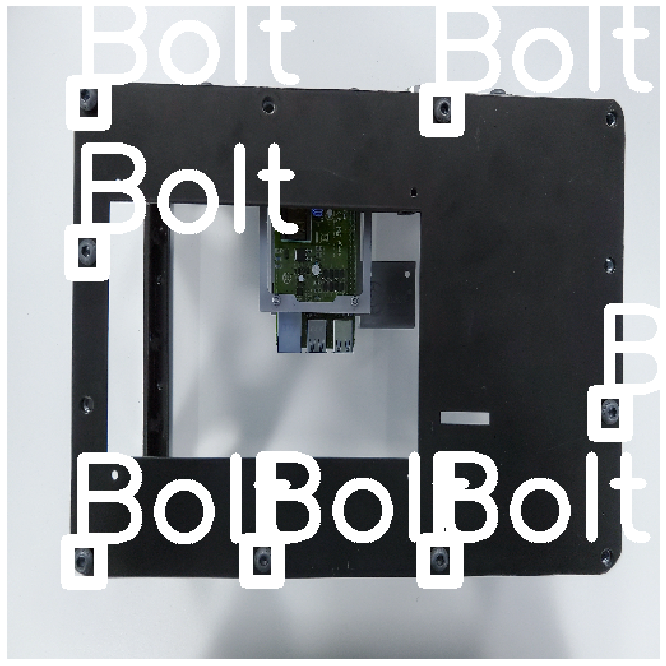

In [12]:
model.valid_dataset.show_data(index)

In [13]:
img = model.valid_dataset[index][0]

In [14]:
targets = model.valid_dataset[index][1]

In [15]:
with torch.no_grad():
    out = model.predict(img.unsqueeze(0))

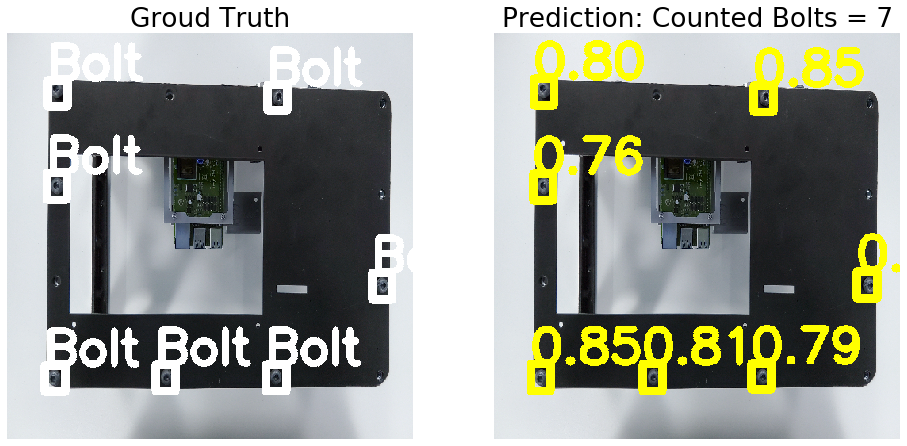

In [16]:
show_prediction_two_plots(img, out, targets)

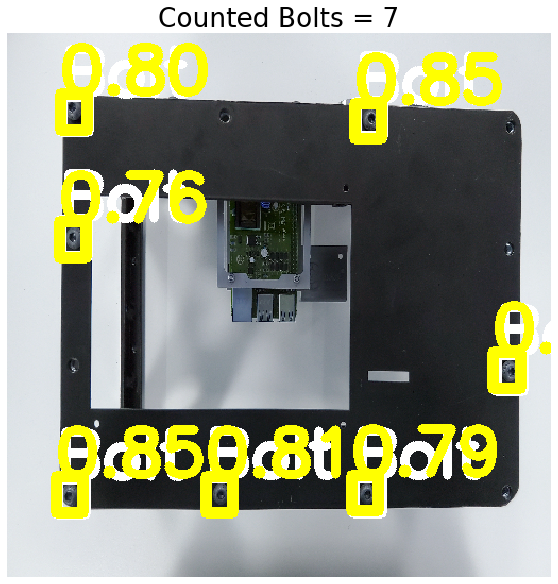

In [17]:
show_prediction_one_plot(img, out, targets)

# Test new Images

In [18]:
transform = A.Compose(
        [
            A.Resize(height=1024, width=1024, p=1),
            A.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
            ToTensorV2(p=1),
        ],
        p=1.0)

In [19]:
image_list = os.listdir('/mnt/hdd/astamoulakatos/NMIS/images_new/')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/hdd/astamoulakatos/NMIS/images_new/'

In [20]:
path = '/mnt/hdd/astamoulakatos/NMIS/images_new/2021-11-19_3_bolts_0013.jpg'

In [21]:
img= cv2.imread(path)        
img = img.transpose(1,0,2)
img = np.flipud(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

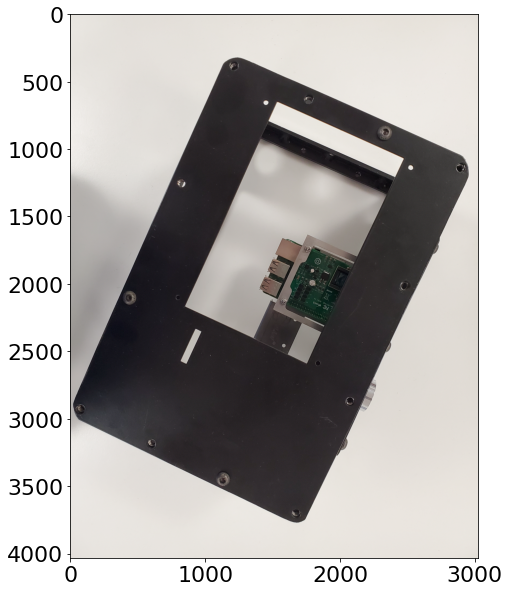

In [22]:
plt.imshow(img)
plt.show()

In [23]:
transformed = transform(image=img)['image']

In [24]:
with torch.no_grad():
    out = model.predict(transformed.unsqueeze(0))

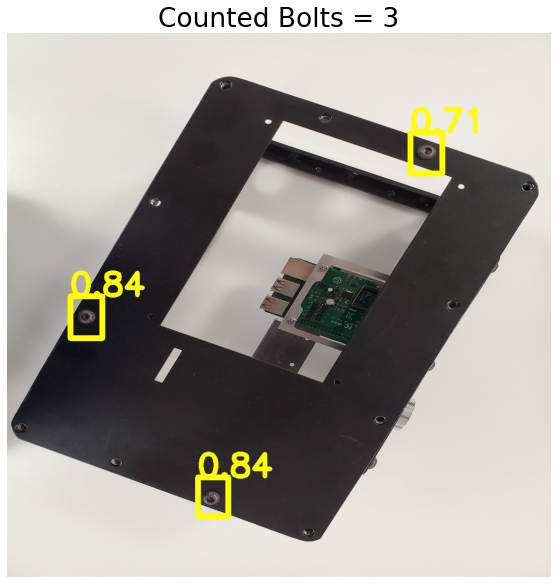

In [25]:
show_prediction_without_gt(transformed, out)